In [1]:
print("Hello World!")

Hello World!


Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#plt.style.use('ggplot')
import scipy as sp
import scipy.stats as stats
%matplotlib inline
import os
from cycler import cycler

from itertools import compress 
from IPython.display import display
#display(df)  # OR
#display(HTML(df2.to_html()))

In [3]:
#legend customizations
### Legend
#legend.loc           : best
#legend.frameon       : True     # if True, draw the legend on a background patch
#legend.framealpha    : 0.8      # legend patch transparency
#legend.facecolor     : inherit  # inherit from axes.facecolor; or color spec
#legend.edgecolor     : 0.8      # background patch boundary color
#legend.fancybox      : True     # if True, use a rounded box for the
                                 # legend background, else a rectangle
#legend.shadow        : False    # if True, give background a shadow effect
#legend.numpoints     : 1        # the number of marker points in the legend line
#legend.scatterpoints : 1        # number of scatter points
#legend.markerscale   : 1.0      # the relative size of legend markers vs. original
#legend.fontsize      : medium
# Dimensions as fraction of fontsize:
#legend.borderpad     : 0.4      # border whitespace
#legend.labelspacing  : 0.5      # the vertical space between the legend entries
#legend.handlelength  : 2.0      # the length of the legend lines
#legend.handleheight  : 0.7      # the height of the legend handle
#legend.handletextpad : 0.8      # the space between the legend line and legend text
#legend.borderaxespad : 0.5      # the border between the axes and legend edge
#legend.columnspacing : 2.0      # column separation

#plt.rcParams['legend.frameon'] = True
#plt.rcParams['legend.facecolor'] = 'white'
#plt.rcParams['legend.edgecolor'] = 'black' 

# Attempt to make the figure size better for our title
#plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.2 #double default value
plt.rcParams.update({'figure.autolayout': True})


In [4]:
fname = 'skill_analysis_scratch.xlsx'
header = pd.read_excel(fname, 'Sheet1', header=None).iloc[1:3,3:].ffill(axis=1) # Take only the header info
header

data = pd.read_excel(fname, 'Sheet1', skiprows=[0,1,2], header=None) # Skip Header Rows
print(data.head())
data.iloc[:,:3] = data.iloc[:,:3].ffill()  # Replace first three columns with feed forward NAs
data = data.set_index([0,1,2]) # Set this as the new index
#data.drop(columns=[3], inplace=True)
data.columns=pd.MultiIndex.from_arrays(header.values)
data.index.names = ['Category', 'Skill', 'SkillLevel']
data
#df= data # give it a new name

                             0    1     2     3    4   5     6   7    8   \
0  Science and Mathematics (SM)  SM1  SM1i  10.0  2.0 NaN  10.0 NaN  2.0   
1                           NaN  NaN  SM1b   2.0  NaN NaN   2.0 NaN  NaN   
2                           NaN  NaN  SM1m   NaN  NaN NaN   NaN NaN  NaN   
3                           NaN  SM2  SM2i  10.0  4.0 NaN  10.0 NaN  4.0   
4                           NaN  NaN  SM2b   NaN  NaN NaN   NaN NaN  NaN   

     9   ...    40  41    42    43    44  45  46  47  48  49  
0  10.0  ...  10.0 NaN  10.0  10.0  10.0 NaN NaN NaN NaN NaN  
1   2.0  ...  10.0 NaN  10.0  10.0  10.0 NaN NaN NaN NaN NaN  
2   NaN  ...   2.0 NaN   2.0   NaN   NaN NaN NaN NaN NaN NaN  
3  10.0  ...  10.0 NaN  10.0   NaN   NaN NaN NaN NaN NaN NaN  
4   NaN  ...  10.0 NaN  10.0   NaN   NaN NaN NaN NaN NaN NaN  

[5 rows x 50 columns]


Mechanics A  \
                                                     Year1   
Category                      Skill SkillLevel               
Science and Mathematics (SM)  SM1   SM1i              10.0   
                                    SM1b               2.0   
                                    SM1m               NaN   
                              SM2   SM2i              10.0   
                                    SM2b               NaN   
...                                                    ...   
Additional General Skills (G) G3    G3i                6.0   
                                    G3                 NaN   
                                    G3m                NaN   
                              G4    G4i                NaN   
                                    G4                 NaN   

                                               Construction Technology 1  \
                                                                   Year1   
Category                      Skill SkillLevel                             
Science and Mathematics (SM)  SM1   SM1i                             2.0   
                                    SM1b                             NaN   
                                    SM1m                             NaN   
                              SM2   SM2i                             4.0   
                                    SM2b                             NaN   
...                                                                  ...   
Additional General Skills (G) G3    G3i                              6.0   
                                    G3                               NaN   
                                    G3m                              NaN   
                              G4    G4i                              NaN   
                                    G4                               NaN   

                                               Introduction to Environment  \
                                                                     Year1   
Category                      Skill SkillLevel                               
Science and Mathematics (SM)  SM1   SM1i                               NaN   
                                    SM1b                               NaN   
                                    SM1m                               NaN   
                              SM2   SM2i                               NaN   
                                    SM2b                               NaN   
...                                                                    ...   
Additional General Skills (G) G3    G3i                                NaN   
                                    G3                                 NaN   
                                    G3m                                NaN   
                              G4    G4i                                2.0   
                                    G4                                 NaN   

                                               Mathematics for Engineers and Scientists 1  \
                                                                                    Year1   
Category                      Skill SkillLevel                                              
Science and Mathematics (SM)  SM1   SM1i                                             10.0   
                                    SM1b                                              2.0   
                                    SM1m                                              NaN   
                              SM2   SM2i                                             10.0   
                                    SM2b                                              NaN   
...                                                                                   ...   
Additional General Skills (G) G3    G3i                                               6.0   
                                    G3                                                NaN 

In [5]:
#rgb colours
colours = [[[192,224,201],[151,204,165],[110,183,129],[69,163,93],[27,142,57]],
[[208,189,215],[177,145,189],[146,100,163],[115,56,137],[84,11,110]],
[[254,206,185],[254,174,139],[254,142,93],[254,110,47],[254,78,0]],
[[186,226,255],[141,207,248],[95,188,240],[50,169,233],[4,150,225]],
[[251,220,217],[248,173,192],[244,125,167],[241,78,142],[237,30,117]],
[[250,232,205],[247,218,172],[244,203,139],[241,189,106],[237,174,73]]]
for i,skill_parent in enumerate(colours):
    for j,val_range in enumerate(skill_parent):
        colours[i][j]= '#{:02X}{:02X}{:02X}FF'.format(val_range[0],val_range[1],val_range[2])
print(colours)

C = { 
'SM' : colours[0],
'EA' : colours[1],
'D'  : colours[2],
'EL' : colours[3],
'P'  : colours[4],
'G'  : colours[5]
}
for key in C:
    print(key)
    if key in 'SM1':
        print(C[key])

[['#C0E0C9FF', '#97CCA5FF', '#6EB781FF', '#45A35DFF', '#1B8E39FF'], ['#D0BDD7FF', '#B191BDFF', '#9264A3FF', '#733889FF', '#540B6EFF'], ['#FECEB9FF', '#FEAE8BFF', '#FE8E5DFF', '#FE6E2FFF', '#FE4E00FF'], ['#BAE2FFFF', '#8DCFF8FF', '#5FBCF0FF', '#32A9E9FF', '#0496E1FF'], ['#FBDCD9FF', '#F8ADC0FF', '#F47DA7FF', '#F14E8EFF', '#ED1E75FF'], ['#FAE8CDFF', '#F7DAACFF', '#F4CB8BFF', '#F1BD6AFF', '#EDAE49FF']]
SM
['#C0E0C9FF', '#97CCA5FF', '#6EB781FF', '#45A35DFF', '#1B8E39FF']
EA
D
EL
P
G


                             0    1           2      3    4   5     6   7   \
0                           NaN  NaN  proj_group  Year1  NaN NaN   NaN NaN   
1  Science and Mathematics (SM)  SM1        SM1i     10  2.0 NaN  10.0 NaN   
2  Science and Mathematics (SM)  SM1        SM1b      2  2.0 NaN   2.0 NaN   

    8     9   ...    40  41    42    43    44  45          46  47  48  49  
0  NaN   NaN  ...   NaN NaN   NaN   NaN   NaN NaN  University NaN NaN NaN  
1  2.0  10.0  ...  10.0 NaN  10.0  10.0  10.0 NaN  University NaN NaN NaN  
2  2.0   2.0  ...  10.0 NaN  10.0  10.0  10.0 NaN  University NaN NaN NaN  

[3 rows x 50 columns]
['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EL1', 'EL2', 'EL3', 'EL4', 'EL5', 'EL6', 'EL7', 'G1', 'G2', 'G3', 'G4', 'P1', 'P10', 'P11', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']


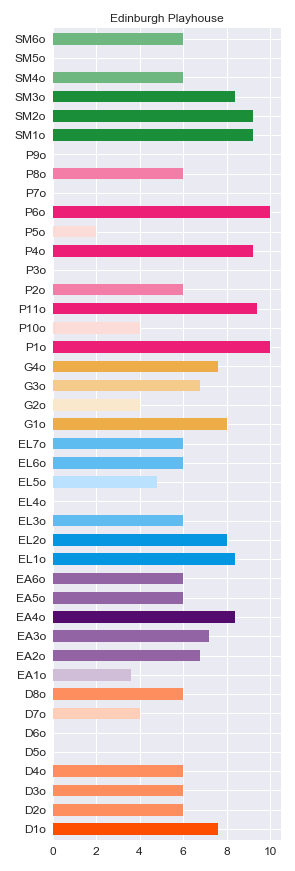

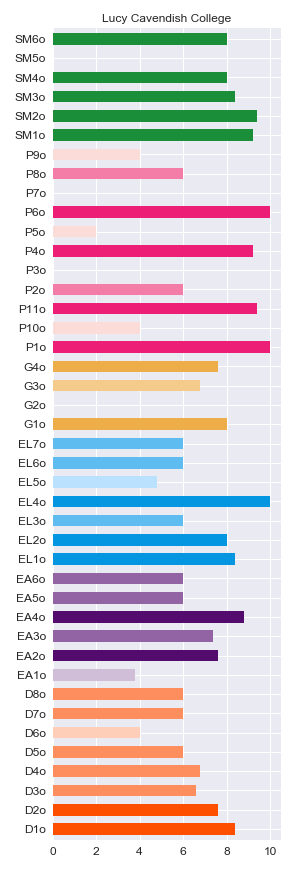

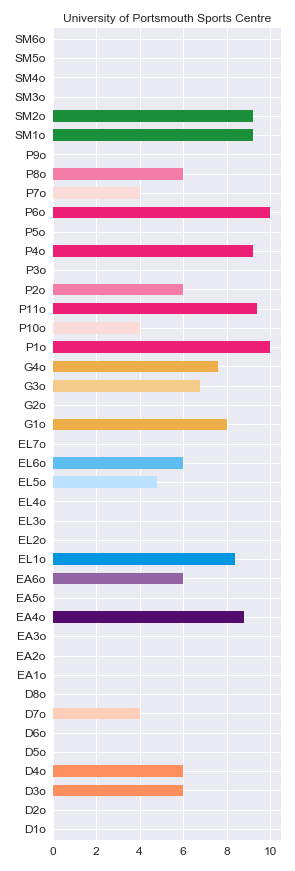

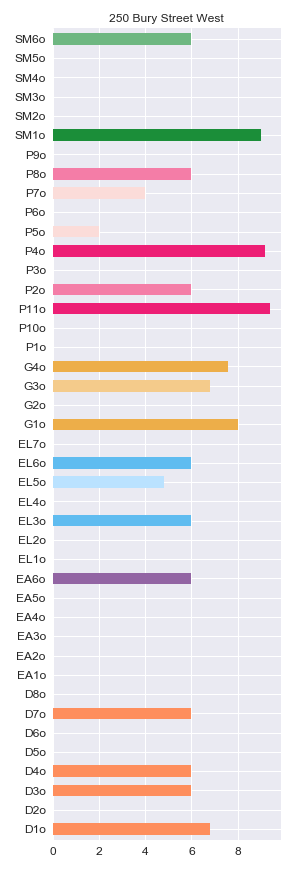

In [6]:
#DataFrame without multi-index is a bit simpler
df_si =  pd.read_excel(fname, 'Sheet1', skiprows=[0], index_col=2, header=0)
df_si.drop(columns=['Unnamed: 0','Unnamed: 1'], inplace=True)
df_si.iloc[0] = df_si.iloc[0].ffill()
dft = df_si.transpose()
#Very Manual Example
#print(dft['SM1i'].fillna(0.0).values)
#print(dft['SM1b'].fillna(0.0).values)
#print(dft['SM1m'].fillna(0.0).values)
#print(dft['SM1i'].fillna(0.0).values*(6/10) + dft['SM1b'].fillna(0.0).values*(3/10) + dft['SM1m'].fillna(0.0).values*(1/10))
#dft['SM1o'] = dft['SM1i'].fillna(0.0).values*(6/10) + dft['SM1b'].fillna(0.0).values*(3/10) + dft['SM1m'].fillna(0.0).values*(1/10)
#dft['SM1o'].plot(kind='barh')

proj_l = [ 'Edinburgh Playhouse','Lucy Cavendish College','University of Portsmouth Sports Centre','250 Bury Street West']
year_l = pd.read_excel(fname, 'Sheet1', skiprows=[0,1], header=None).iloc[0:3:].ffill()
print(year_l)
#'Year1', 'Year2','Year3','Year4','Year5' ARE in the xcel sheet, but we ignored it for simpicity. TODO: Add it in. 
#Changes where the bands are for each skill
weights = [[1.0], [0.6,0.4], [0.6,0.3,0.1]]
df_skill = pd.read_excel(fname, 'Sheet1', skiprows=[0,1,2], header=None).iloc[:,1].ffill()
skill_l = list(set(df_skill.values))
skill_l.sort()
print(skill_l)

for skill in skill_l:
    skill_levels = df_si[df_si.index.str.match(pat=skill+'([a-z])?$', case=False )].index
    num_skill_levels = len(skill_levels)
    # dot product to multiply and sum weights to skill level set
    #print('ThisSkill'+skill)
    #print('Filled0z{}'.format((dft[skill_levels])))
    #print('weights={}'.format(weights[num_skill_levels-1]))
    dft[skill+'o'] = np.dot(dft[skill_levels].fillna(0.0).values, weights[num_skill_levels-1])

    
for proj in proj_l:
    skill_vals = [skill+'o' for skill in skill_l]

    for key in C:
        #print(key)
        skillbool = [key in skill+'o' for skill in skill_l]
        #print(skillbool)
        skill_famv = list(compress(skill_vals, skillbool))
        #print(skill_famv)
        
        #skill_vals = [skill+'o' for skill in skill_l]
        #print([(dft[skill_vals]>=3.0) & (dft[skill_vals]<7.5)])
        dft[dft[skill_famv]>=7.5][skill_vals].transpose()[proj].plot(
            kind='barh', title=proj,color=C[key][4], fontsize=12, width=0.6, figsize=(4,12)
        )
        dft[(dft[skill_famv]>=3.0) & (dft[skill_famv]<7.5)][skill_vals].transpose()[proj].plot(
            kind='barh', title=proj,color=C[key][2], fontsize=12, width=0.6
        )
        dft[dft[skill_famv]<5.0][skill_vals].transpose()[proj].plot(
            kind='barh', title=proj,color=C[key][0], fontsize=12, width=0.6,
        )
    plt.savefig('plots/{}_skill_map.svg'.format(proj))
    plt.show()


D1o     7.6
D2o       6
D3o       6
D4o       6
D5o       0
D6o       0
D7o       4
D8o       6
EA1o    3.6
EA2o    6.8
EA3o    7.2
EA4o    8.4
EA5o      6
EA6o      6
EL1o    8.4
EL2o      8
EL3o      6
EL4o      0
EL5o    4.8
EL6o      6
EL7o      6
G1o       8
G2o       4
G3o     6.8
G4o     7.6
P1o      10
P10o      4
P11o    9.4
P2o       6
P3o       0
P4o     9.2
P5o       2
P6o      10
P7o       0
P8o       6
P9o       0
SM1o    9.2
SM2o    9.2
SM3o    8.4
SM4o      6
SM5o      0
SM6o      6
Name: Edinburgh Playhouse, dtype: object

[0, 1, 2, 3, 4, 5]
posf is [[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857142], [1.0, 1.1428571428571428, 1.2857142857142856, 1.4285714285714286, 1.5714285714285714, 1.7142857142857142], [2.0, 2.111111111111111, 2.2222222222222223, 2.3333333333333335, 2.4444444444444446, 2.5555555555555554, 2.6666666666666665, 2.7777777777777777], [3.0, 3.125, 3.25, 3.375, 3.5, 3.625, 3.75], [4.0, 4.083333333333333, 4.166666666666667, 4.25, 4.333333333333333, 4.416666666666667, 4.5, 4.583333333333333, 4.666666666666667, 4.75, 4.833333333333333], [5.0, 5.2, 5.4, 5.6]]
['SM1o', 'SM2o', 'SM3o', 'SM4o', 'SM5o', 'SM6o']
0
[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857142]
['EA1o', 'EA2o', 'EA3o', 'EA4o', 'EA5o', 'EA6o']
0
[1.0, 1.1428571428571428, 1.2857142857142856, 1.4285714285714286, 1.5714285714285714, 1.7142857142857142]
['D1o', 'D2o', 'D3o', 'D4o', 'D5o', 'D6o', 'D7o', 'D8o']
0
[2.0, 2.111

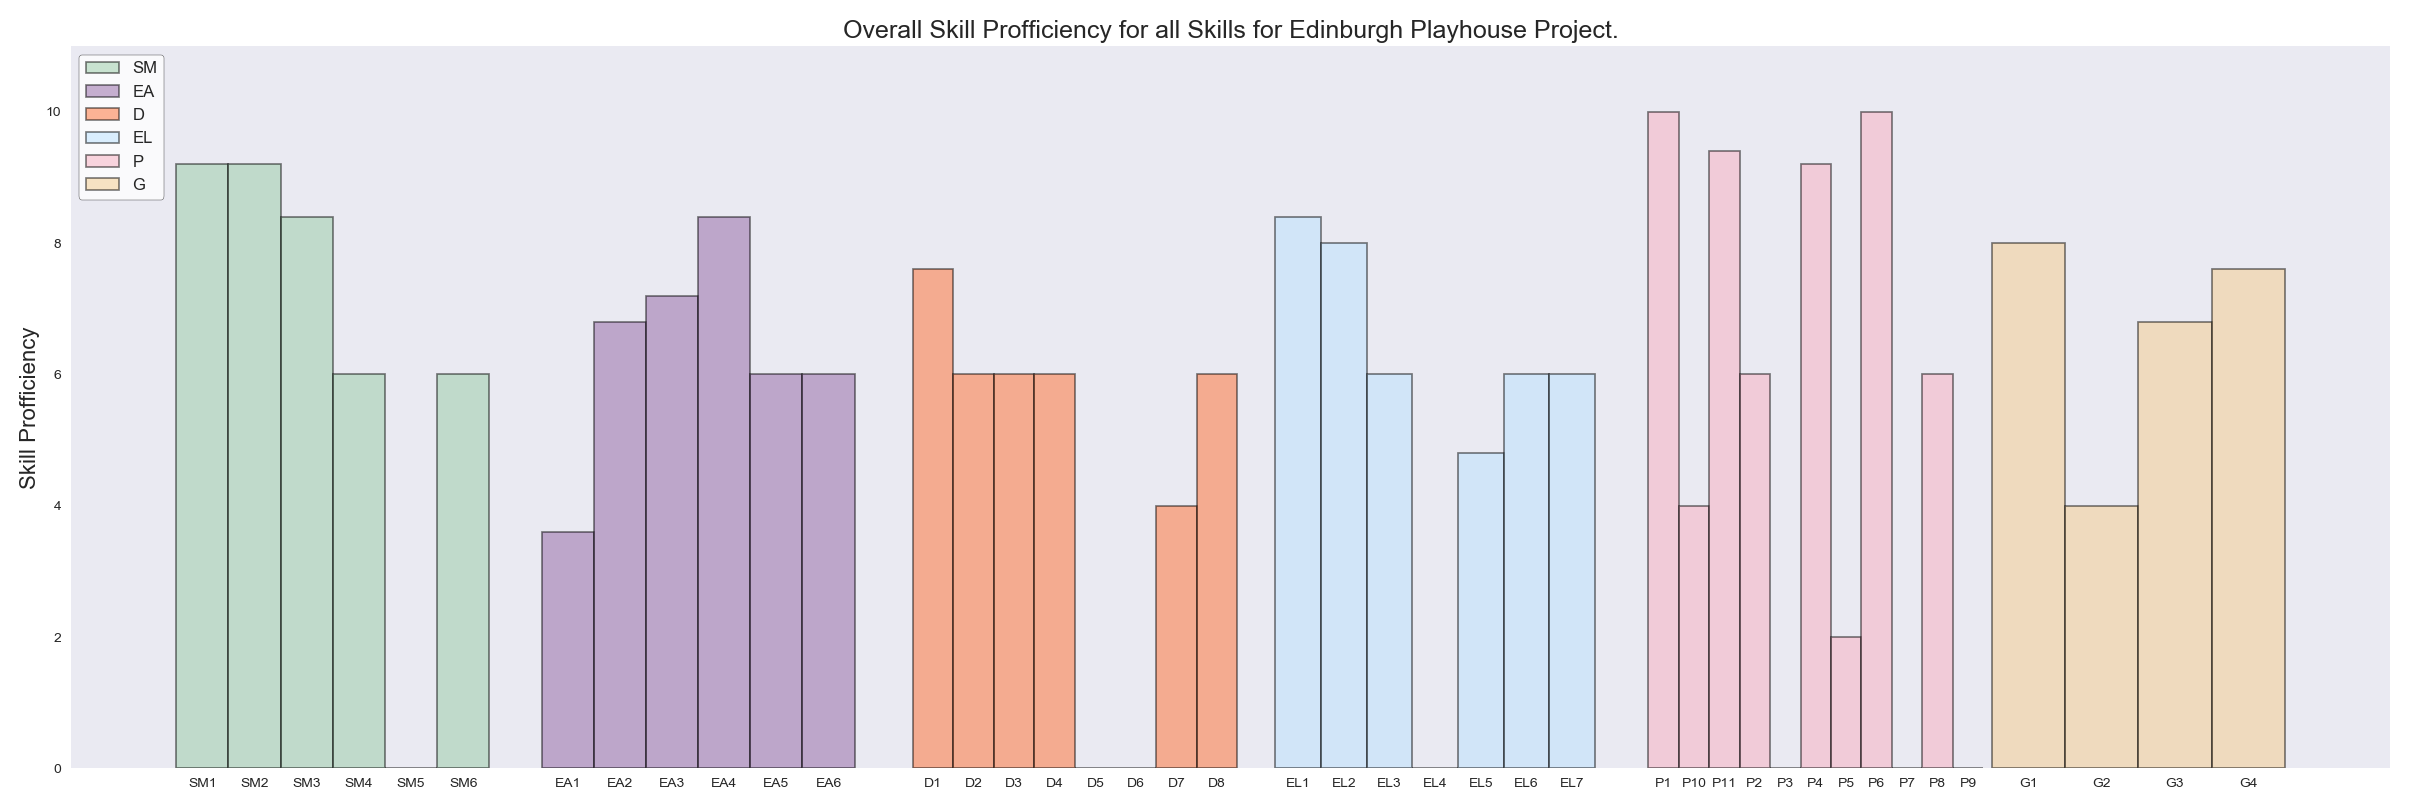

posf is [[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857142], [1.0, 1.1428571428571428, 1.2857142857142856, 1.4285714285714286, 1.5714285714285714, 1.7142857142857142], [2.0, 2.111111111111111, 2.2222222222222223, 2.3333333333333335, 2.4444444444444446, 2.5555555555555554, 2.6666666666666665, 2.7777777777777777], [3.0, 3.125, 3.25, 3.375, 3.5, 3.625, 3.75], [4.0, 4.083333333333333, 4.166666666666667, 4.25, 4.333333333333333, 4.416666666666667, 4.5, 4.583333333333333, 4.666666666666667, 4.75, 4.833333333333333], [5.0, 5.2, 5.4, 5.6]]
['SM1o', 'SM2o', 'SM3o', 'SM4o', 'SM5o', 'SM6o']
0
[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857142]
['EA1o', 'EA2o', 'EA3o', 'EA4o', 'EA5o', 'EA6o']
0
[1.0, 1.1428571428571428, 1.2857142857142856, 1.4285714285714286, 1.5714285714285714, 1.7142857142857142]
['D1o', 'D2o', 'D3o', 'D4o', 'D5o', 'D6o', 'D7o', 'D8o']
0
[2.0, 2.111111111111111, 2.222

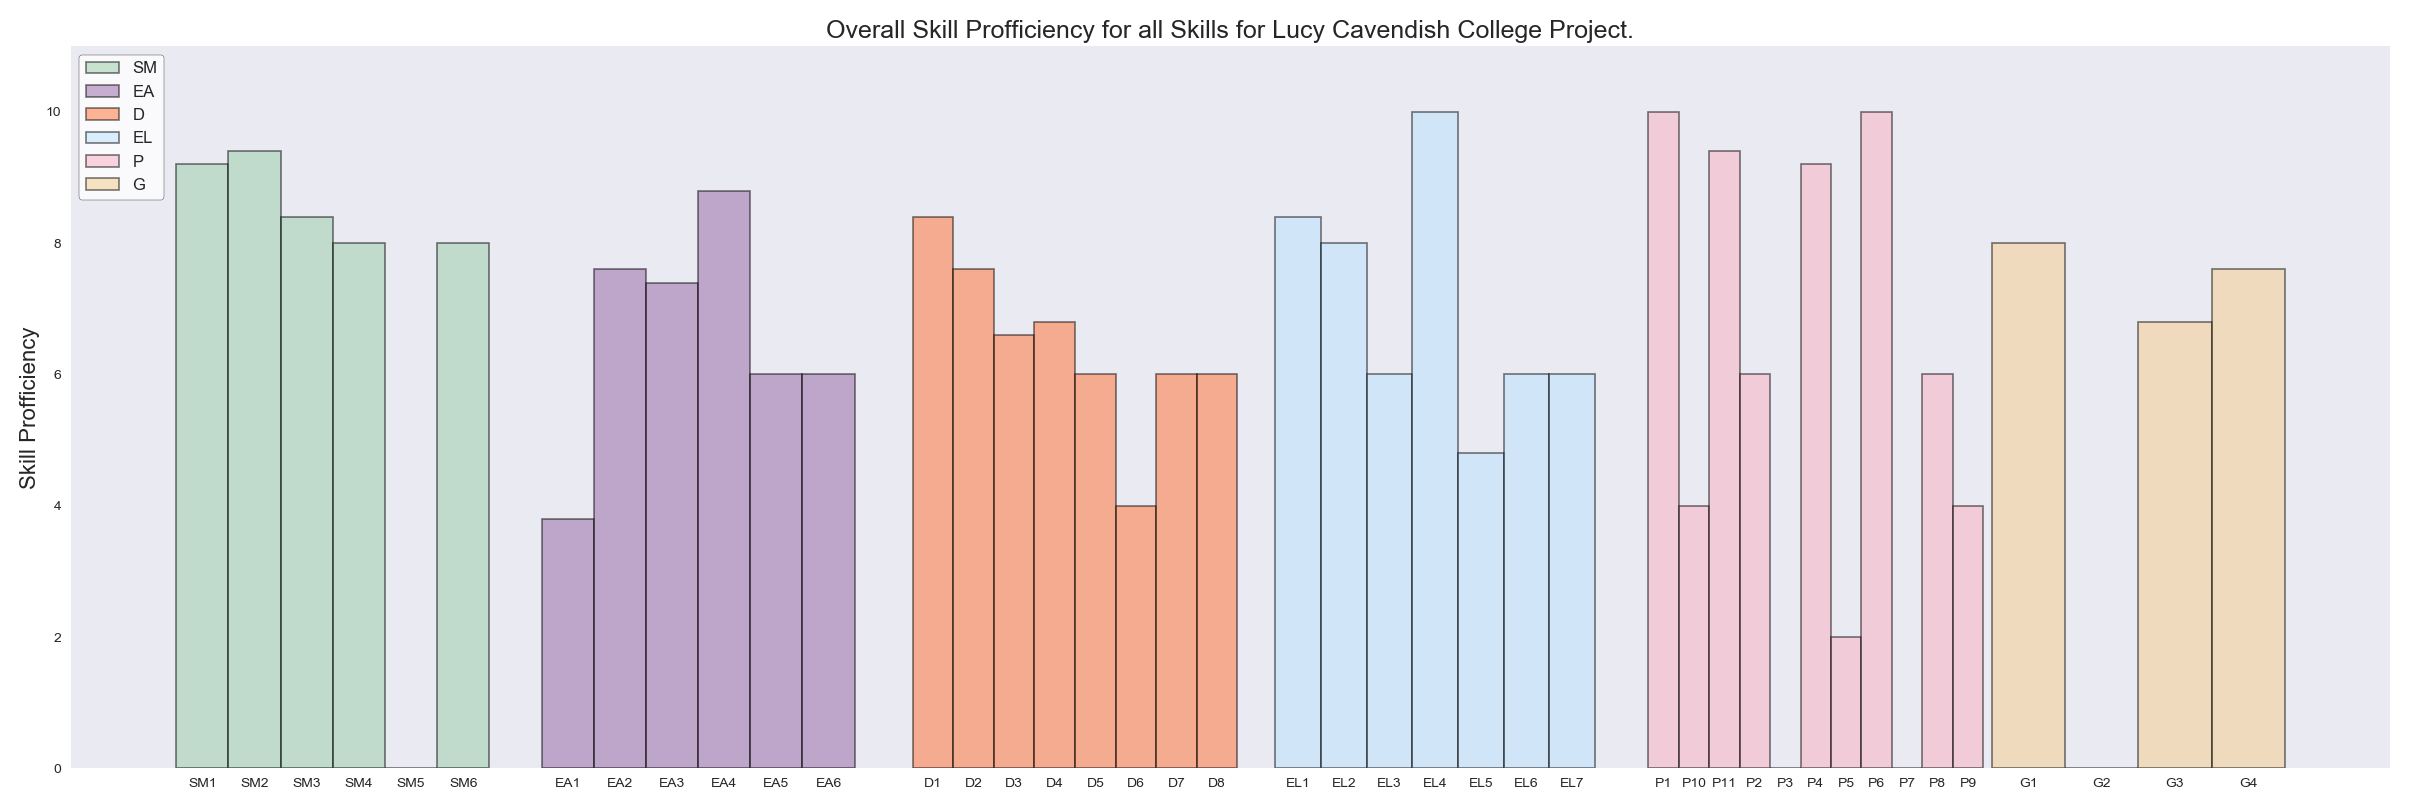

posf is [[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857142], [1.0, 1.1428571428571428, 1.2857142857142856, 1.4285714285714286, 1.5714285714285714, 1.7142857142857142], [2.0, 2.111111111111111, 2.2222222222222223, 2.3333333333333335, 2.4444444444444446, 2.5555555555555554, 2.6666666666666665, 2.7777777777777777], [3.0, 3.125, 3.25, 3.375, 3.5, 3.625, 3.75], [4.0, 4.083333333333333, 4.166666666666667, 4.25, 4.333333333333333, 4.416666666666667, 4.5, 4.583333333333333, 4.666666666666667, 4.75, 4.833333333333333], [5.0, 5.2, 5.4, 5.6]]
['SM1o', 'SM2o', 'SM3o', 'SM4o', 'SM5o', 'SM6o']
0
[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857142]
['EA1o', 'EA2o', 'EA3o', 'EA4o', 'EA5o', 'EA6o']
0
[1.0, 1.1428571428571428, 1.2857142857142856, 1.4285714285714286, 1.5714285714285714, 1.7142857142857142]
['D1o', 'D2o', 'D3o', 'D4o', 'D5o', 'D6o', 'D7o', 'D8o']
0
[2.0, 2.111111111111111, 2.222

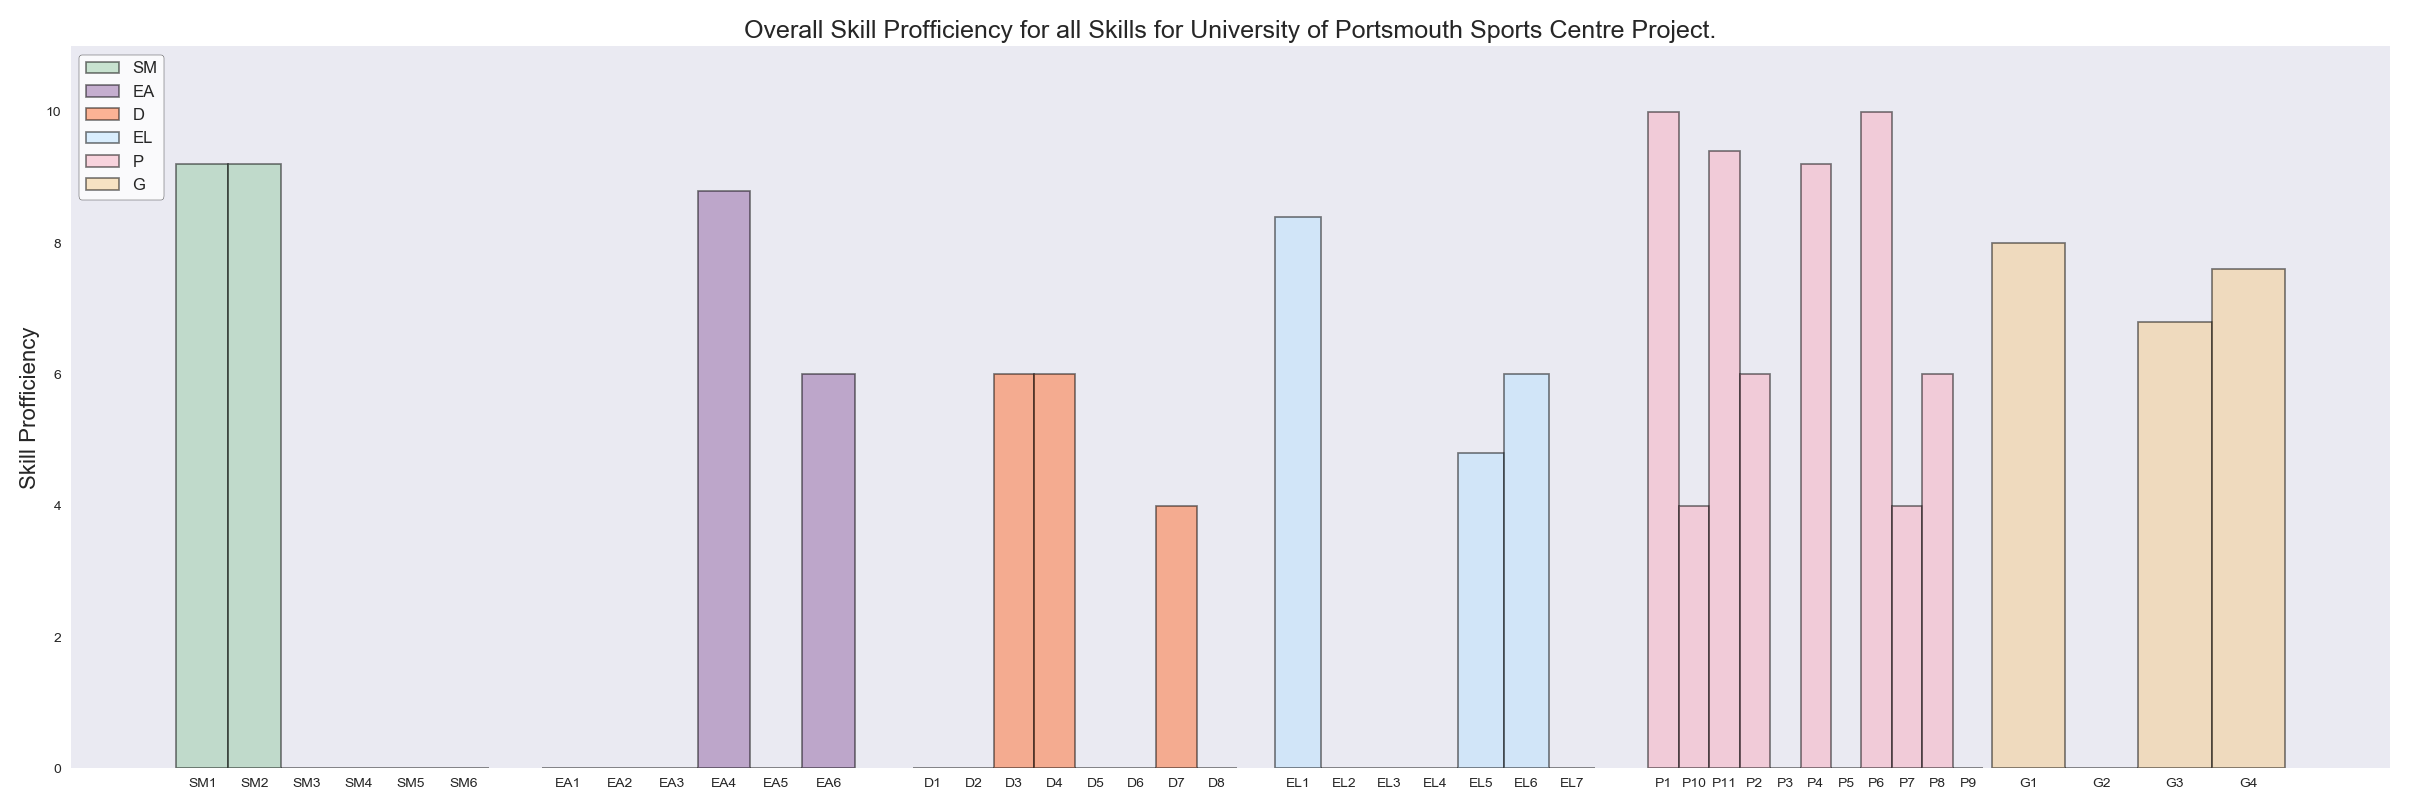

posf is [[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857142], [1.0, 1.1428571428571428, 1.2857142857142856, 1.4285714285714286, 1.5714285714285714, 1.7142857142857142], [2.0, 2.111111111111111, 2.2222222222222223, 2.3333333333333335, 2.4444444444444446, 2.5555555555555554, 2.6666666666666665, 2.7777777777777777], [3.0, 3.125, 3.25, 3.375, 3.5, 3.625, 3.75], [4.0, 4.083333333333333, 4.166666666666667, 4.25, 4.333333333333333, 4.416666666666667, 4.5, 4.583333333333333, 4.666666666666667, 4.75, 4.833333333333333], [5.0, 5.2, 5.4, 5.6]]
['SM1o', 'SM2o', 'SM3o', 'SM4o', 'SM5o', 'SM6o']
0
[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857142]
['EA1o', 'EA2o', 'EA3o', 'EA4o', 'EA5o', 'EA6o']
0
[1.0, 1.1428571428571428, 1.2857142857142856, 1.4285714285714286, 1.5714285714285714, 1.7142857142857142]
['D1o', 'D2o', 'D3o', 'D4o', 'D5o', 'D6o', 'D7o', 'D8o']
0
[2.0, 2.111111111111111, 2.222

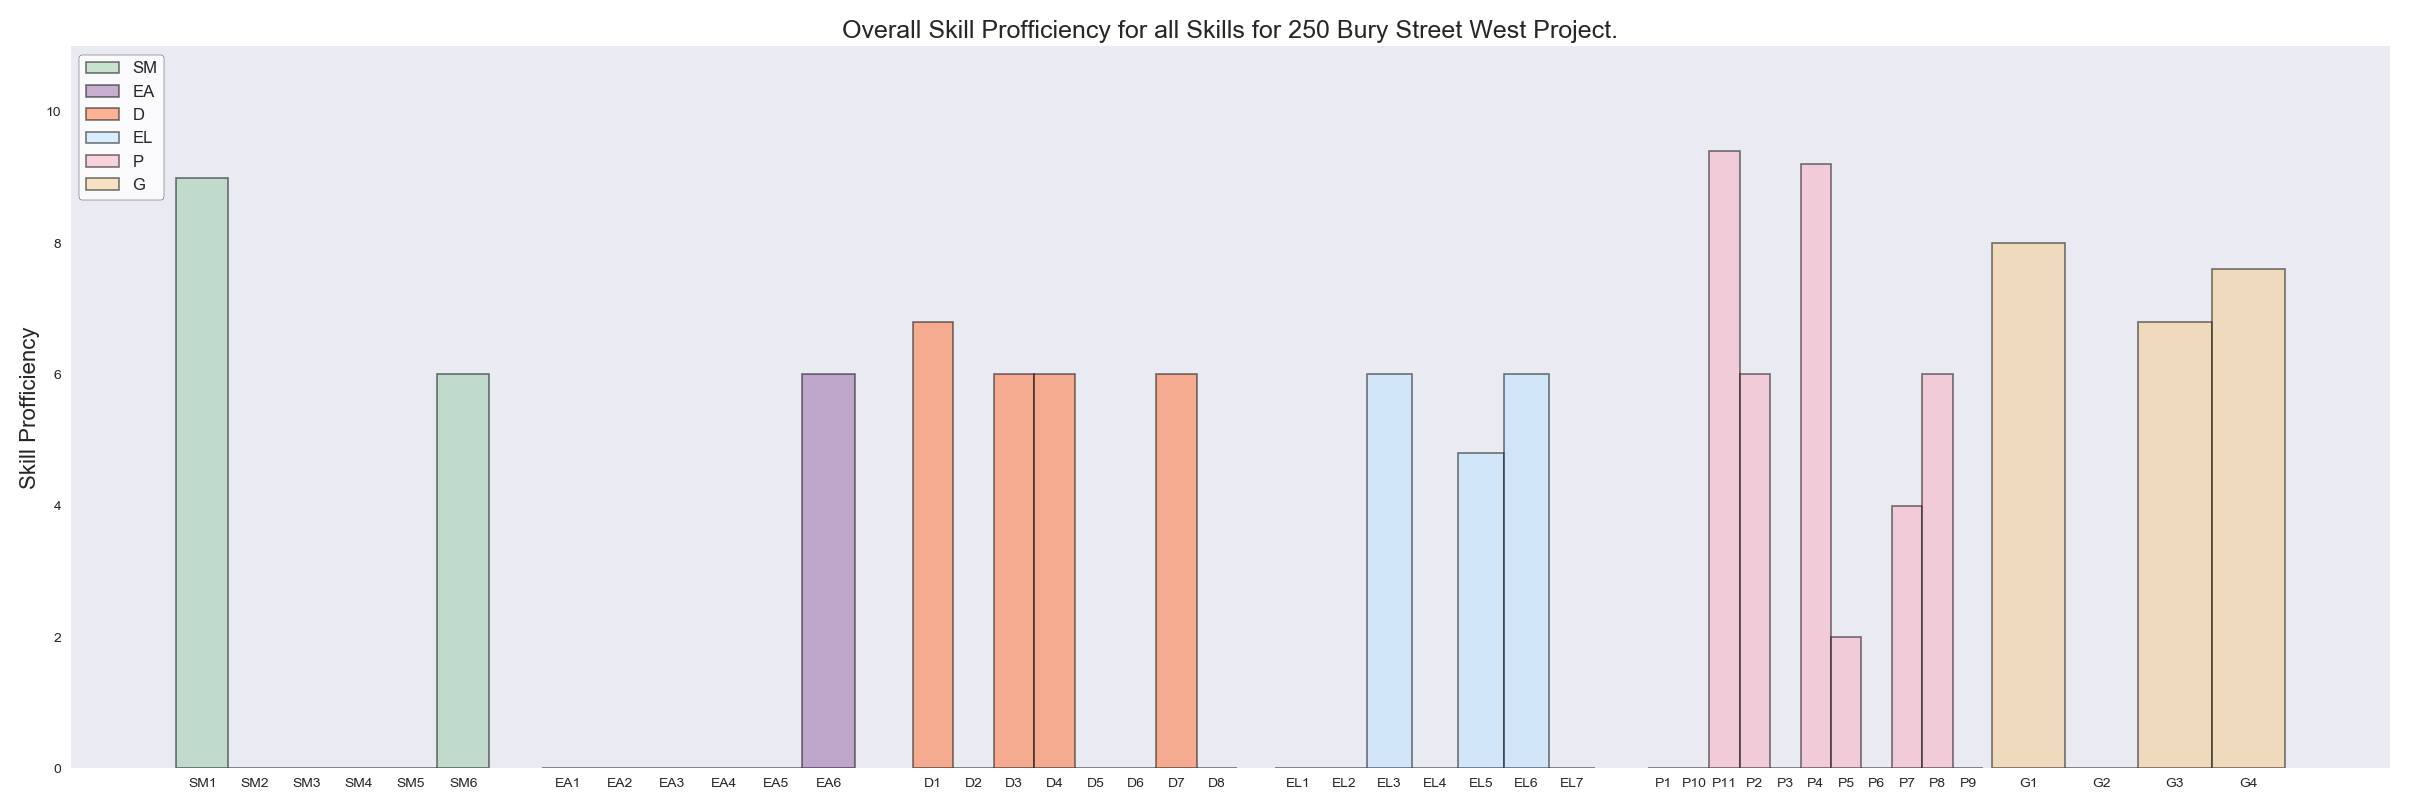

In [7]:
#print(key)

    
    #proj_list = ['Year1_avg', 'Year2_avg', 'Year3_avg', 'Year4_avg', 'MaxFordham_avg']
    # number of distinct groups
    #pos = list(range(len(dftt.transpose()[proj_list[0]][skillo_faml]))) 
    #print(pos)
    
        #dftt.transpose()[proj][skillo_l])))

        



plt.rcdefaults() 
style = 'seaborn'
plt.style.use(style)
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'black' 
plt.rcParams['legend.fancybox'] =  True

#plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.2 #double default value
plt.rcParams.update({'figure.autolayout': True})

proj_list = [ 'Edinburgh Playhouse','Lucy Cavendish College','University of Portsmouth Sports Centre','250 Bury Street West']
dftt = dft
skillo_l = [skill+'o' for skill in skill_l]
display(dftt.transpose()[proj_list[0]][skillo_l])
print(list(range(len(C))))
skillo_ordered= [list]
posf = [list]
poss = [list]
if 1 : 
    for proj_i,proj in enumerate(proj_list):
        skillo_ordered.clear()
        posf.clear()
        for fam_i,fam in enumerate(C):
            #print(fam_i)
            poss.clear()
            skillo_faml = list(compress(skillo_l, [fam in skill for skill in skillo_l]))
            width = (1/(len(dftt.transpose()[proj][skillo_faml])+1))
            for ski,skill in enumerate(skillo_faml):
                #print(skillo_faml)
                poss.append(fam_i+ski*width )#+(len(skillo_faml)>8)*0.05*ski*width)
                #print(poss)
            posf.append(list(poss))
            #posf = [*posf, *poss]
        
        #pos = [fam_i+ ski* for fam_i,fam in enumerate(list(range(len(C)))) for ski,skill in enumerate(skillo_faml) for skillo_faml in list(compress(skillo_l, [fam in skill for skill in skillo_l]))]
        print("posf is {}".format(posf))
        # Plotting the bars
        fig, ax = plt.subplots(figsize=(24,8))
        
        for i, fam in enumerate(C):
            pos_fam = list(range(len(C)))
            #for i,proj in enumerate(proj_list): 
            famfilt_bool = [fam in skill for skill in skillo_l]
            #print("{} : {}".format(key, famfilt_bool))
            #print(skillbool)
            # only get skills where famfilt_bool is true.
            skillo_faml = list(compress(skillo_l, famfilt_bool))
            skillo_ordered += skillo_faml
            print(skillo_faml)  
            #Veriable width per family -- desired??
            width = 1/(len(dftt.transpose()[proj][skillo_faml])+1)
            print((len(skillo_faml)>8)*2)
            pos_skill = [i+ski*width for ski,skill in enumerate(skillo_faml)]
            print(pos_skill)
            plt.bar(posf[i], 
                    #using df['pre_score'] data,
                    dftt.transpose()[proj][skillo_faml], 
                    # of width
                    width, 
                    # with alpha 0.5
                    alpha=0.5, 
                    # with color
                    color=C[fam][((i+1) % (len(C[fam])-1))],
                    # with label the first value in first_name
                    edgecolor = 'black',
                    linewidth = 1.25,
                    label=fam)
        ## Set the y axis label
        ax.set_ylabel('Skill Profficiency', fontsize=16)
        #
        ### Set the chart's title
        ax.set_title('Overall Skill Profficiency for all Skills for {} Project.'.format(proj), fontsize=18)
        ##
        ### Set the position of the x ticks
        offset = -0.125 # TWEAK THIS
        pos_flat = [item for sublist in posf for item in sublist]
        print("Helllo Fam {}".format(pos_flat))
        ax.set_xticks(pos_flat)
        print(skillo_ordered)
        ### Set the labels for the x ticks
        ax.set_xticklabels([skillo[:-1] for skillo in skillo_ordered]) #[skillo[:-1] for skillo in skillo_faml], fontsize=16) # remove 'o'
        ##
        ### Setting the x-axis and y-axis limits
        ##Optional..
        ##plt.xlim(min(pos)-width, max(pos)+width*4)
        plt.ylim([0, 11] )
        ##
        ### Adding the legend and showing the plot
        plt.legend(C, loc='upper left', fontsize=12)
        ## This seems to remove grid tiles from graph
        
        plt.grid()
        plt.savefig('plots/skillo_map_{}.svg'.format(proj))
        plt.show()

Index(['Year4 : Laboratory Project',
       'Year4 : Sustainable and Intelligent Buildings',
       'Year4 : Innovation in Construction Practice', 'Year4 : Dissertation',
       'Year4 : Design Project'],
      dtype='object')
Index(['Year2 : Acoustics and Architectural Design',
       'Year2 : Design Project A',
       'Year2 : Hydraulics & Hydrology A (elective)',
       'Year2 : Construction Technology 2',
       'Year2 : Environment and Behaviour', 'Year2 : Design Project B',
       'Year2 : Energy Principles and Applications',
       'Year2 : Statistics for Science'],
      dtype='object')
Index(['Year5 : Climate Change, Sustainability and Adaptation (elective)',
       'Year5 : Water Supply and Drainage for Buildings (elective)',
       'Year5 : Industrial Project', 'Year5 : Architectural Acoustics',
       'Year5 : Thermofluids', 'Year5 : Design of Low Carbon Buildings',
       'Year5 : Urban Drainage and Supply (elective)'],
      dtype='object')
Index(['Year1 : Mechanics A', '

C:\Users\dbee\Applications\Anaconda\envs\my_mult\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Year2_avg
Year5_avg
Year1_avg
MaxFordham_avg
University_avg
Year3_avg


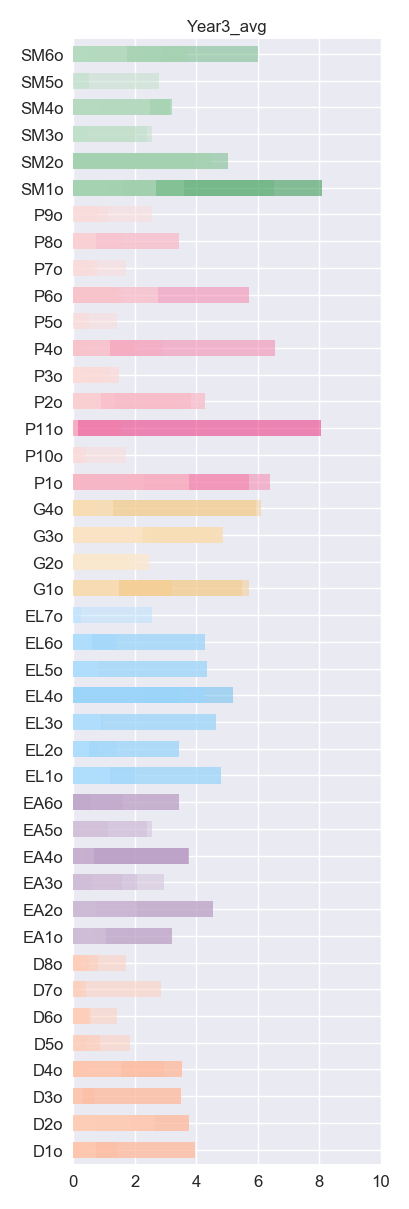

In [8]:
pgroup_l = list(set(dft['proj_group'].values))
dft_si= dft.transpose()
for pgroup in pgroup_l:
    print(pgroup+' : '+dft['proj_group'][dft['proj_group']==pgroup].transpose().index)
    proj_l = dft['proj_group'][dft['proj_group']==pgroup].transpose().index
    # Make a new column in the dft for the concat result of the prog_grpup , make the list og prog_g the proj_l rto plot an it will work!
    skill_vals = [skill+'o' for skill in skill_l]
    dft_si[pgroup+'_avg'] = np.full(len(dft.transpose().index), np.nan)
    for skill in skill_l:
        #print('{} : {}'.format(skill+'o', dft[skill+'o'].transpose()[proj_l].transpose().values)) # Last transpose puts it back to dft oritnttion 
        
        dft_si[pgroup+'_avg'].loc[skill+'o'] = dft[skill+'o'].transpose()[proj_l].transpose().values.mean()
dft_si
dftt = dft_si.transpose()
yi=0

#TODO: https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/
#https://www.pythoncharts.com/2019/03/26/grouped-bar-charts-matplotlib/
# OR 
#Better use of space : https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py
for proj in pgroup_l:
    print(proj+'_avg')
    proj = proj+'_avg'
    
    for key in C:
        #print(key)
        skillbool = [key in skill+'o' for skill in skill_l]
        #print(skillbool)
        skill_famv = list(compress(skill_vals, skillbool))
        #print(skill_famv)
        
        #skill_vals = [skill+'o' for skill in skill_l]
        #print([(dft[skill_vals]>=3.0) & (dft[skill_vals]<7.5)])
        dftt[dftt[skill_famv]>=7.5][skill_vals].transpose()[proj].plot(
            kind='barh', title=proj,color=C[key][4], fontsize=12, width=0.6,xlim=(0,10),alpha=0.5, y=yi, figsize=(4,12)
        )
        dftt[(dftt[skill_famv]>=3.0) & (dftt[skill_famv]<7.5)][skill_vals].transpose()[proj].plot(
            kind='barh', title=proj,color=C[key][2], fontsize=12, width=0.6,xlim=(0,10),alpha=0.5, y=yi
        )
        dftt[dftt[skill_famv]<5.0][skill_vals].transpose()[proj].plot(
            kind='barh', title=proj,color=C[key][0], fontsize=12, width=0.6,xlim=(0,10),alpha=0.5, y=yi
        )
        yi=yi+1
plt.savefig('plots/{}_skill_map.svg'.format(pgroup_l))
plt.show()

Integrate to our data

['D1o', 'D2o', 'D3o', 'D4o', 'D5o', 'D6o', 'D7o', 'D8o', 'EA1o', 'EA2o', 'EA3o', 'EA4o', 'EA5o', 'EA6o', 'EL1o', 'EL2o', 'EL3o', 'EL4o', 'EL5o', 'EL6o', 'EL7o', 'G1o', 'G2o', 'G3o', 'G4o', 'P1o', 'P10o', 'P11o', 'P2o', 'P3o', 'P4o', 'P5o', 'P6o', 'P7o', 'P8o', 'P9o', 'SM1o', 'SM2o', 'SM3o', 'SM4o', 'SM5o', 'SM6o']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


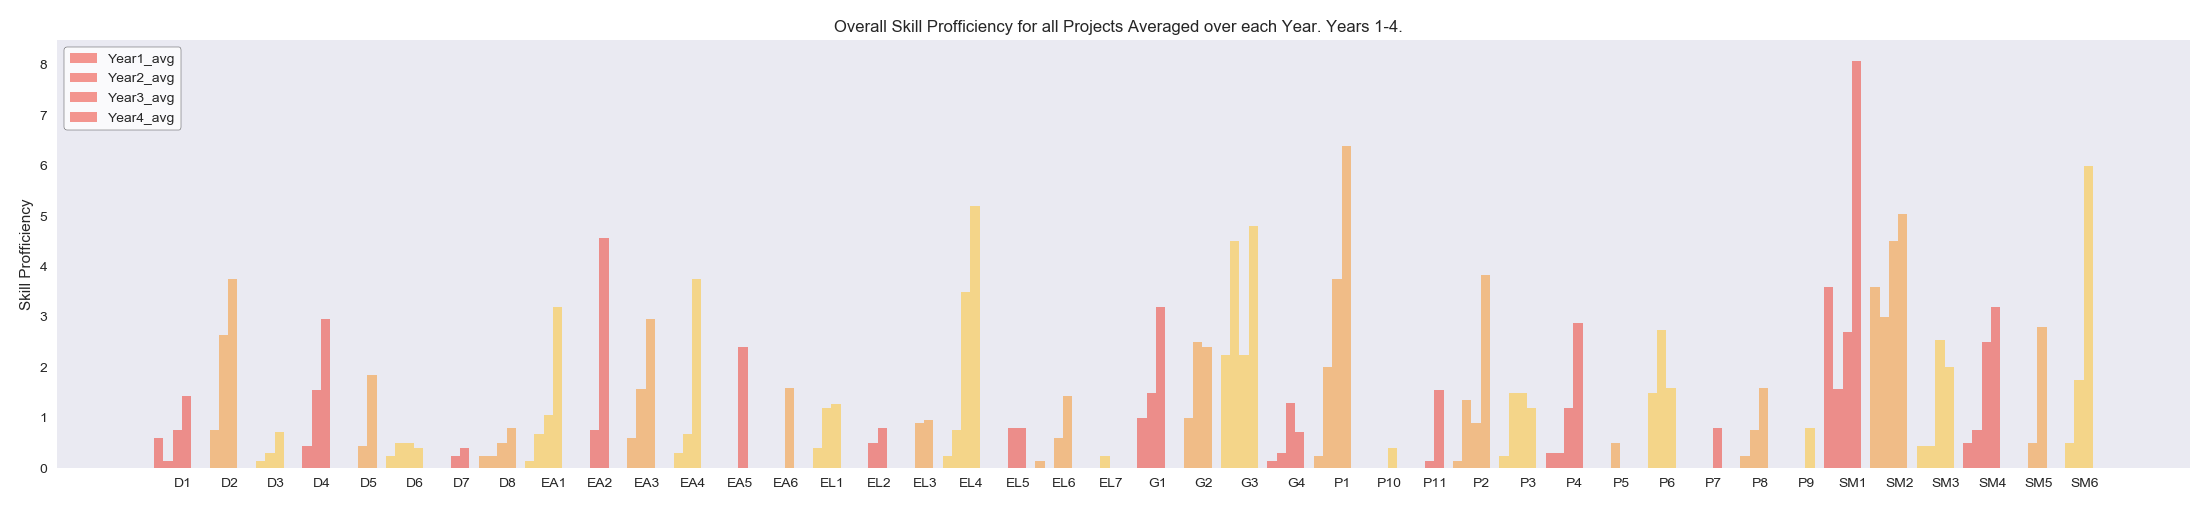

In [9]:
print([skill+'o' for skill in skill_l])
skillo_l = [skill+'o' for skill in skill_l]
proj_list = ['Year1_avg', 'Year2_avg', 'Year3_avg', 'Year4_avg']
# number of distinct groups
pos = list(range(len(dftt.transpose()[proj_list[0]][skillo_l]))) 
print(pos)
width = 0.2
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(22,5))


##dftt[skill_vals].transpose()[proj] #[dftt[skill_famv]>=7.5]
#print(dftt['SM1o'][['Year1_avg', 'Year2_avg', 'Year3_avg']])
#print(pos)
## Create a bar with pre_score data,
## in position pos,
for i,proj in enumerate(proj_list): 
    
    plt.bar([p+ width*i for p in pos], 
            #using df['pre_score'] data,
            dftt.transpose()[proj][skillo_l], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color=['#EE3224','#F78F1E','#FFC222'] ,
            # with label the first value in first_name
            label=proj)

### Create a bar with mid_score data,
### in position pos + some width buffer,
#plt.bar([p + width for p in pos], 
#        #using df['mid_score'] data,
#        dftt['SM2o'][['Year1_avg', 'Year2_avg', 'Year3_avg']],
#        # of width
#        width, 
#        # with alpha 0.5
#        alpha=0.5, 
#        # with color
#        color='#F78F1E', 
#        # with label the second value in first_name
#        label='Year2') 
#
## Create a bar with post_score data,
## in position pos + some width buffer,
#plt.bar([p + width*2 for p in pos], 
#        #using df['post_score'] data,
#        dftt['SM3o'][['Year1_avg', 'Year2_avg', 'Year3_avg']], 
#        # of width
#        width, 
#        # with alpha 0.5
#        alpha=0.5, 
#        # with color
#        color='#FFC222', 
#        # with label the third value in first_name
#        label='Year3') 
#
#
## Set the y axis label
ax.set_ylabel('Skill Profficiency')
#
### Set the chart's title
ax.set_title('Overall Skill Profficiency for all Projects Averaged over each Year. Years 1-4.  ')
##
### Set the position of the x ticks
offset = 0.125 
ax.set_xticks([p + offset + (len(proj_list)/2 * width) for p in pos])
##
### Set the labels for the x ticks
ax.set_xticklabels(skill_l)
##
### Setting the x-axis and y-axis limits
##Optional..
##plt.xlim(min(pos)-width, max(pos)+width*4)
##plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )
##
### Adding the legend and showing the plot
plt.legend(proj_list, loc='upper left')
## This seems to remove grid tiles from graph
plt.grid()
plt.savefig('plots/{}_allskillo_map.svg'.format(proj_list))
plt.show()

['SM1o', 'SM2o', 'SM3o', 'SM4o', 'SM5o', 'SM6o']
[0, 1, 2, 3, 4, 5]


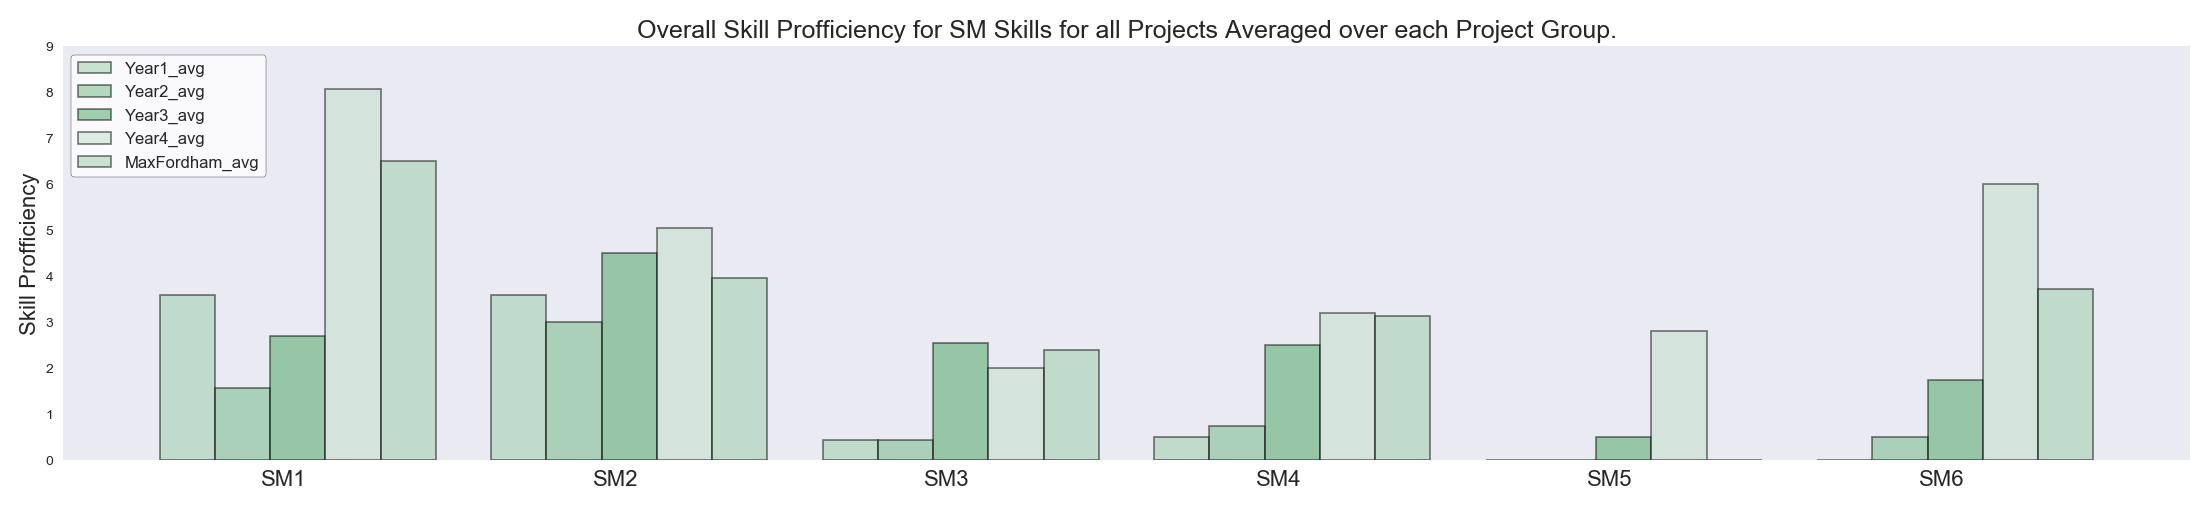

['EA1o', 'EA2o', 'EA3o', 'EA4o', 'EA5o', 'EA6o']
[0, 1, 2, 3, 4, 5]


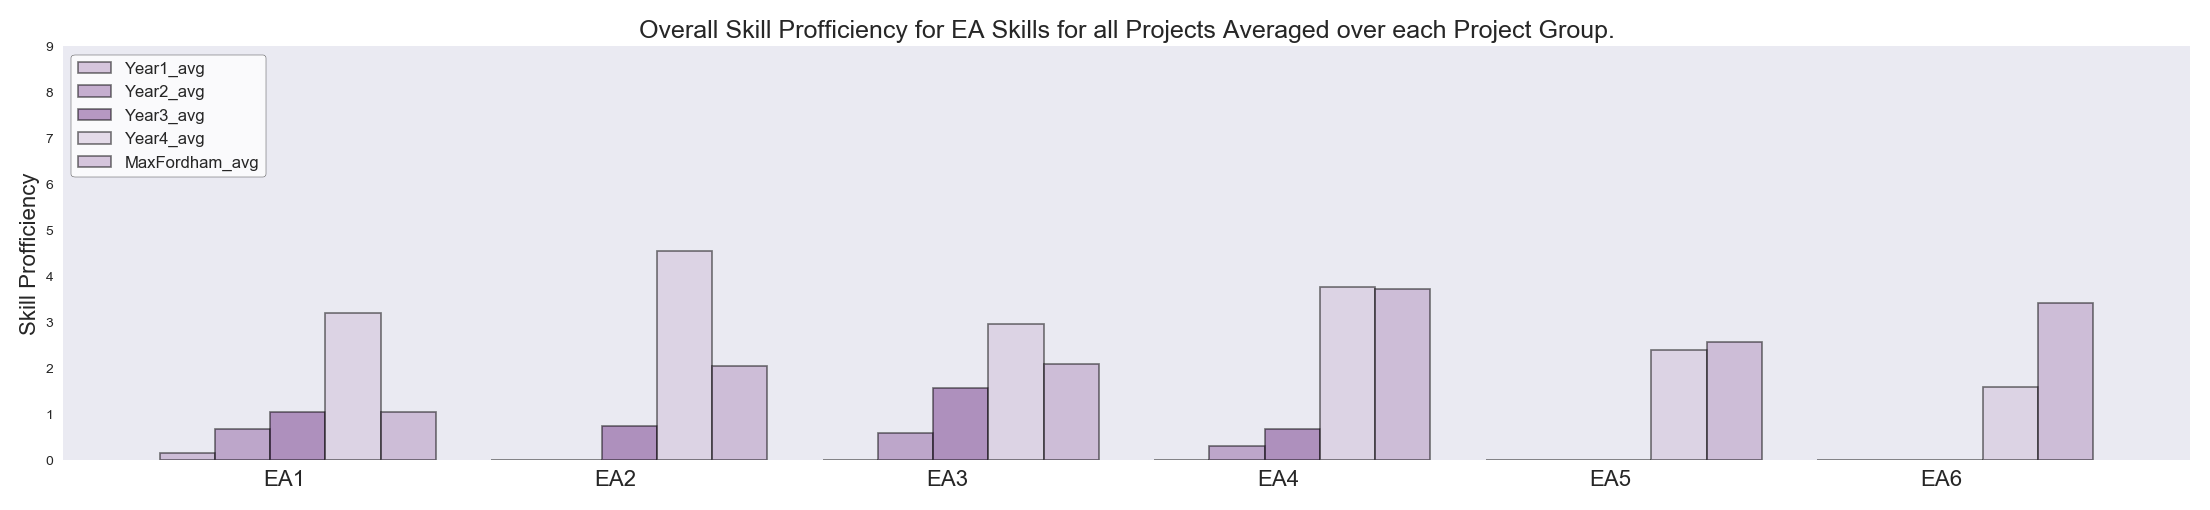

['D1o', 'D2o', 'D3o', 'D4o', 'D5o', 'D6o', 'D7o', 'D8o']
[0, 1, 2, 3, 4, 5, 6, 7]


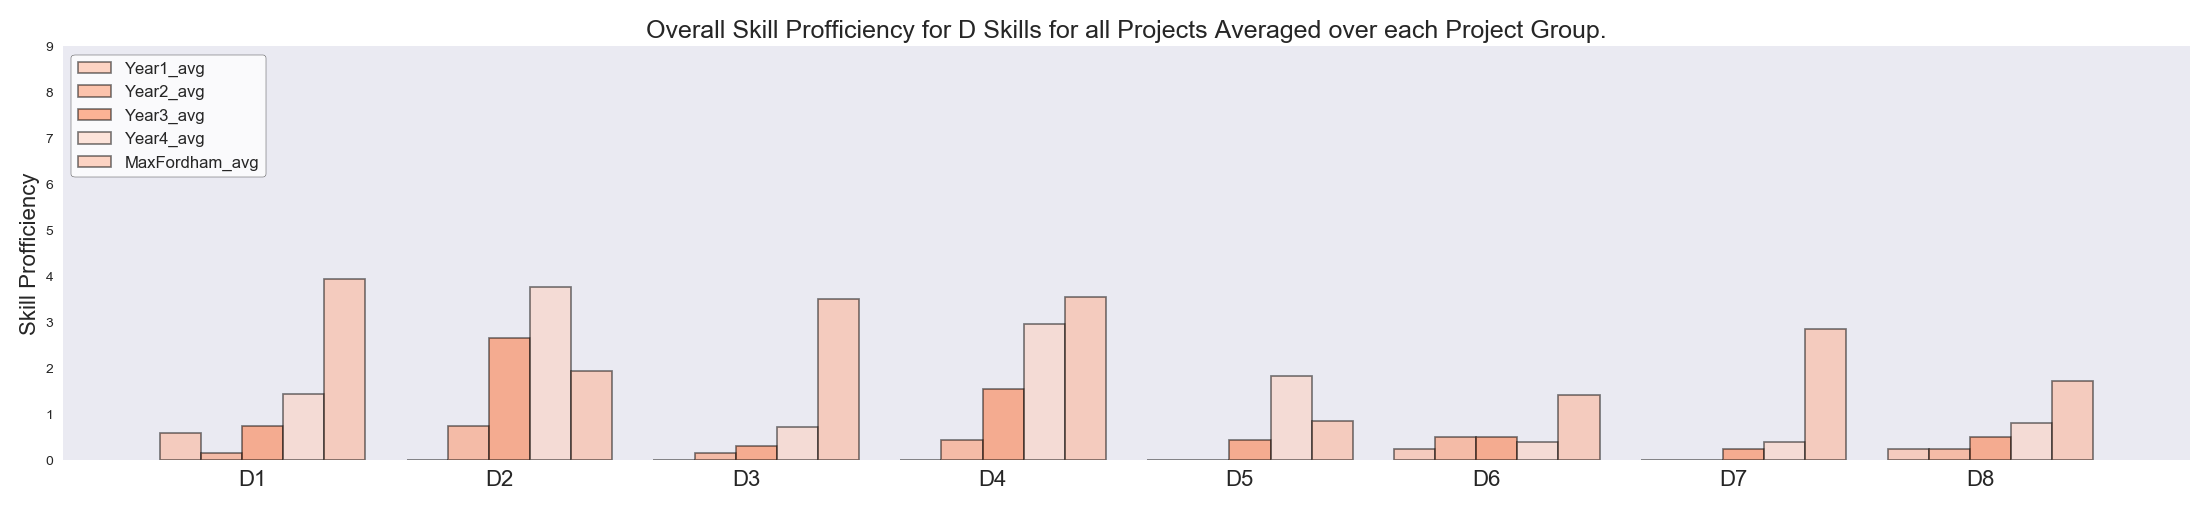

['EL1o', 'EL2o', 'EL3o', 'EL4o', 'EL5o', 'EL6o', 'EL7o']
[0, 1, 2, 3, 4, 5, 6]


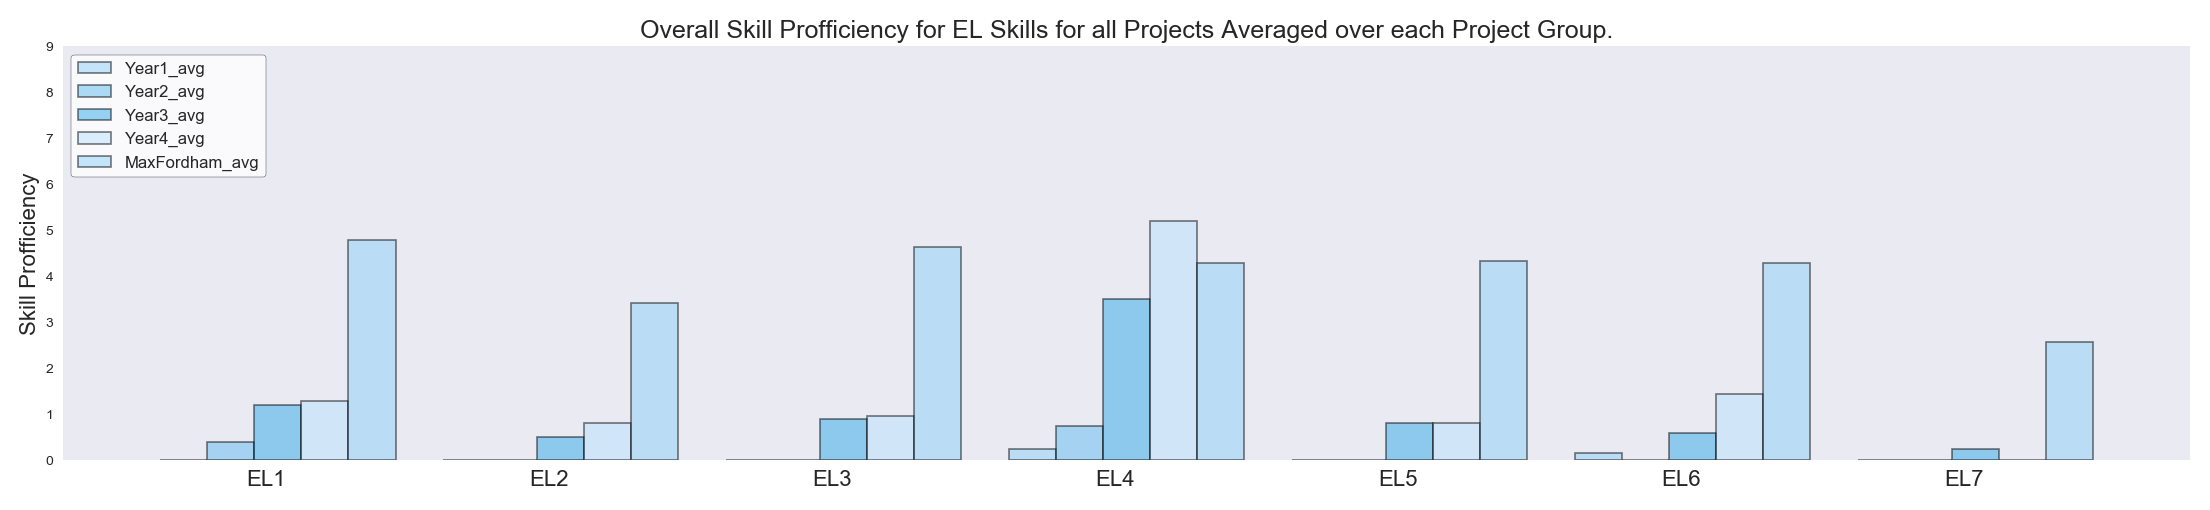

['P1o', 'P10o', 'P11o', 'P2o', 'P3o', 'P4o', 'P5o', 'P6o', 'P7o', 'P8o', 'P9o']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


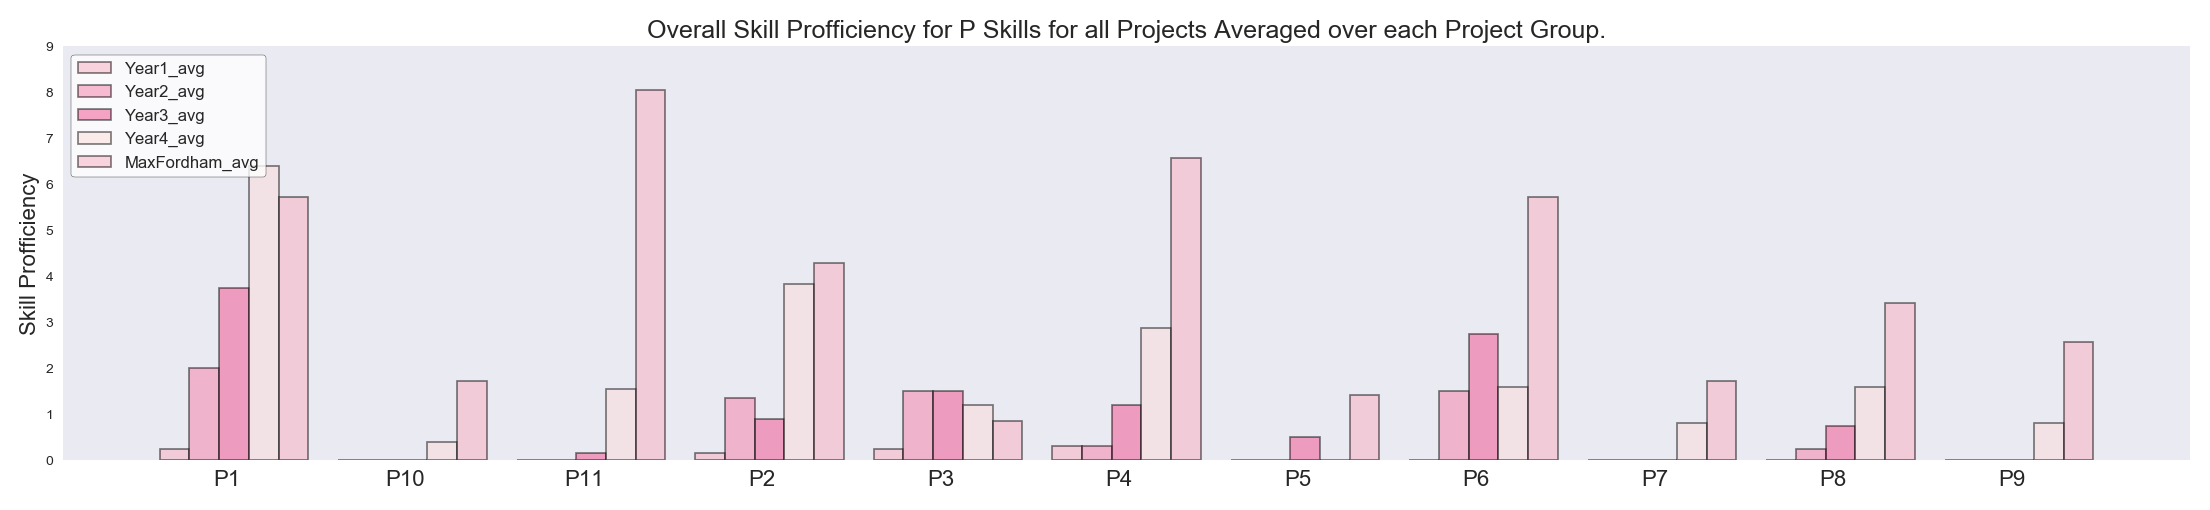

['G1o', 'G2o', 'G3o', 'G4o']
[0, 1, 2, 3]


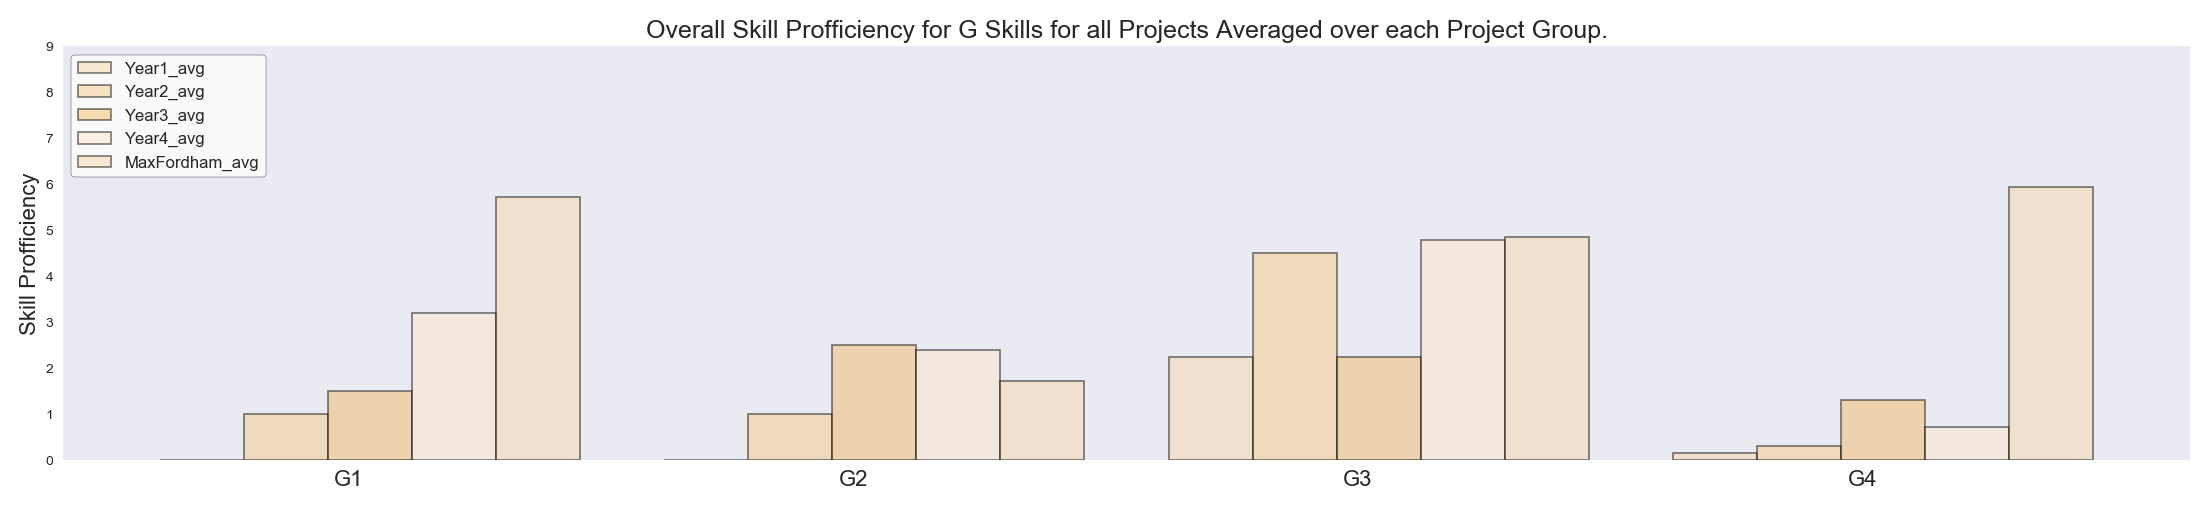

In [10]:

#legend customizations
### Legend
#legend.loc           : best
#legend.frameon       : True     # if True, draw the legend on a background patch
#legend.framealpha    : 0.8      # legend patch transparency
#legend.facecolor     : inherit  # inherit from axes.facecolor; or color spec
#legend.edgecolor     : 0.8      # background patch boundary color
#legend.fancybox      : True     # if True, use a rounded box for the
                                 # legend background, else a rectangle
#legend.shadow        : False    # if True, give background a shadow effect
#legend.numpoints     : 1        # the number of marker points in the legend line
#legend.scatterpoints : 1        # number of scatter points
#legend.markerscale   : 1.0      # the relative size of legend markers vs. original
#legend.fontsize      : medium
# Dimensions as fraction of fontsize:
#legend.borderpad     : 0.4      # border whitespace
#legend.labelspacing  : 0.5      # the vertical space between the legend entries
#legend.handlelength  : 2.0      # the length of the legend lines
#legend.handleheight  : 0.7      # the height of the legend handle
#legend.handletextpad : 0.8      # the space between the legend line and legend text
#legend.borderaxespad : 0.5      # the border between the axes and legend edge
#legend.columnspacing : 2.0      # column separation

#plt.rcParams['legend.frameon'] = True
#plt.rcParams['legend.facecolor'] = 'white'
#plt.rcParams['legend.edgecolor'] = 'black' 
#plt.rcParams['legend.fancybox'] =  True
plt.rcdefaults() 
style = 'seaborn'
plt.style.use(style)
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'black' 
plt.rcParams['legend.fancybox'] =  True


#plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.2 #double default value
plt.rcParams.update({'figure.autolayout': True})


#plt.style.use('ggplot')
# Attempt to make the figure size better for our title
#plt.rcParams['savefig.bbox'] = 'tight'
#plt.rcParams['savefig.pad_inches'] = 0.2 #double default value

for key in C:
    #print(key)
    famfilt_bool = [key in skill for skill in skillo_l]
    #print("{} : {}".format(key, famfilt_bool))
    #print(skillbool)
    skillo_faml = list(compress(skillo_l, famfilt_bool))
    print(skillo_faml)
    
    proj_list = ['Year1_avg', 'Year2_avg', 'Year3_avg', 'Year4_avg', 'MaxFordham_avg']
    # number of distinct groups
    pos = list(range(len(dftt.transpose()[proj_list[0]][skillo_faml]))) 
    print(pos)
    width = 1/(len(proj_list)+1)
        
    # Plotting the bars
    fig, ax = plt.subplots(figsize=(22,5))
    
    
    ##dftt[skill_vals].transpose()[proj] #[dftt[skill_famv]>=7.5]
    #print(dftt['SM1o'][['Year1_avg', 'Year2_avg', 'Year3_avg']])
    #print(pos)
    ## Create a bar with pre_score data,
    ## in position pos,
    for i,proj in enumerate(proj_list): 
        
        plt.bar([p+ width*i for p in pos], 
                #using df['pre_score'] data,
                dftt.transpose()[proj][skillo_faml], 
                # of width
                width, 
                # with alpha 0.5
                alpha=0.5, 
                # with color
                color=C[key][((i+1) % (len(C[key])-1))],
                # with label the first value in first_name
                edgecolor = 'black',
                linewidth = 1.25,
                label=proj)
    ## Set the y axis label
    ax.set_ylabel('Skill Profficiency', fontsize=16)
    #
    ### Set the chart's title
    ax.set_title('Overall Skill Profficiency for {} Skills for all Projects Averaged over each Project Group.'.format(key), fontsize=18)
    ##
    ### Set the position of the x ticks
    offset = -0.125 # TWEAK THIS
    ax.set_xticks([p + offset + (len(proj_list)/2 * width) for p in pos])
    ##
    ### Set the labels for the x ticks
    ax.set_xticklabels([skillo[:-1] for skillo in skillo_faml], fontsize=16) # remove 'o'
    ##
    ### Setting the x-axis and y-axis limits
    ##Optional..
    ##plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim([0, 9] )
    ##
    ### Adding the legend and showing the plot
    plt.legend(proj_list, loc='upper left', fontsize=12)
    ## This seems to remove grid tiles from graph
    
    plt.grid()
    plt.savefig('plots/{}_skillfam{}_map.svg'.format(proj_list,key))
    plt.show()

In [11]:
#sheet_name 

fname = 'SkillAnalysis_191201.xlsx'
df = pd.read_excel(fname, 'Sheet8', header=2).iloc[:,2:]
#.iloc[1:3,3:].ffill(axis=1) # Take only the header info
df.iloc[:,0] = df.iloc[:,0].ffill()
df.dropna(inplace=True)
df
#data = pd.read_excel(fname, 'Sheet1', skiprows=[0,1,2], header=None) # Skip Header Rows
#print(data.head())


,Year,Course,Grade,Interest
0,Year1,Mathematics for Engineers and Scientists A,0.97,1.0
1,Year1,Mathematics for Engineers and Scientists B,0.89,1.0
2,Year1,Mechanics A,0.78,1.0
3,Year1,Mechanics B,0.96,1.0
4,Year1,Introduction to Environment,0.74,0.7
5,Year1,Introduction to Design,0.66,0.6
6,Year1,Construction Technology A,0.81,0.8
7,Year1,Building Services Technology,0.72,0.8
8,Year2,Acoustics and Architectural Design,0.66,0.7
9,Year2,Environment and Behaviour,0.65,0.7


,Year,Course,Grade,Interest
0,Year1,Mathematics for Engineers and Scientists A,0.97,1.0
1,Year1,Mathematics for Engineers and Scientists B,0.89,1.0
2,Year1,Mechanics A,0.78,1.0
3,Year1,Mechanics B,0.96,1.0
4,Year1,Introduction to Environment,0.74,0.7
5,Year1,Introduction to Design,0.66,0.6
6,Year1,Construction Technology A,0.81,0.8
7,Year1,Building Services Technology,0.72,0.8


,Year,Course,Grade,Interest
8,Year2,Acoustics and Architectural Design,0.66,0.7
9,Year2,Environment and Behaviour,0.65,0.7
10,Year2,Statistics for Science,0.82,0.7
11,Year2,Construction Technology B,0.61,0.6
12,Year2,Energy Principles and Applications,0.85,0.8
13,Year2,Design Project A,0.79,0.8
14,Year2,Design Project B,0.73,0.8
15,Year2,Hydraulics and Hydrology A (Elective),0.50,0.7


,Year,Course,Grade,Interest
16,Year3,Critical Architecture Studies,0.70,0.7
17,Year3,Electrical and Lighting Services for Buildings,0.60,0.7
18,Year3,Design Software Applications,0.61,0.7
19,Year3,Procurement and Contracts,0.68,0.5
20,Year3,Design Issues,0.72,0.8
21,Year3,Energy and Buildings,0.72,0.7
22,Year3,Thermal Performance Studies,0.66,0.7
23,Year3,Environmental Engineering A (Elective),0.68,0.7


,Year,Course,Grade,Interest
24,Year4,Design Project,0.72,1.0
25,Year4,Dissertation,0.72,1.0
26,Year4,Laboratory Project,0.60,0.5
27,Year4,Sustainable and Intelligent Buildings,0.74,0.9
28,Year4,Innovation in Construction Practices,0.87,0.9


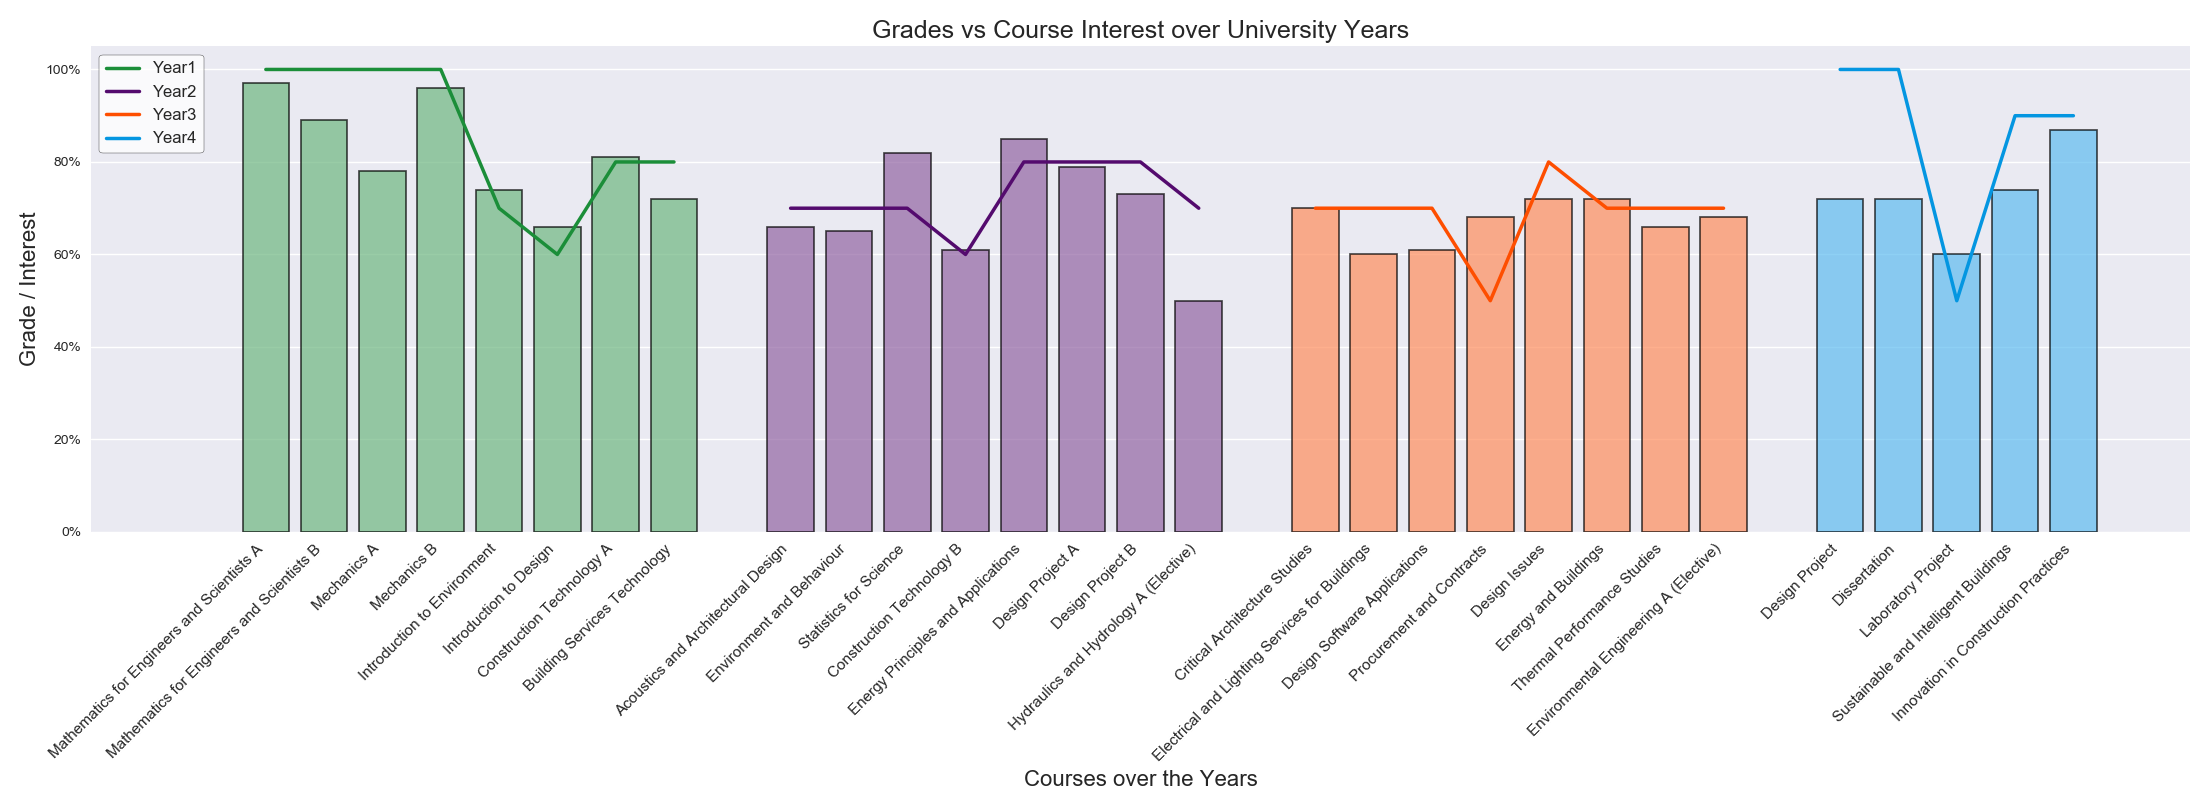

In [12]:
C_S = C 
C_Y={
    'Year1': ['#C0E0C9FF', '#97CCA5FF', '#6EB781FF', '#45A35DFF', '#1B8E39FF'],
     'Year2': ['#D0BDD7FF', '#B191BDFF', '#9264A3FF', '#733889FF', '#540B6EFF'],
     'Year3': ['#FECEB9FF', '#FEAE8BFF', '#FE8E5DFF', '#FE6E2FFF', '#FE4E00FF'],
     'Year4': ['#BAE2FFFF', '#8DCFF8FF', '#5FBCF0FF', '#32A9E9FF', '#0496E1FF'],
     #'Year5': ['#FBDCD9FF', '#F8ADC0FF', '#F47DA7FF', '#F14E8EFF', '#ED1E75FF'],
     #'YearX': ['#FAE8CDFF', '#F7DAACFF', '#F4CB8BFF', '#F1BD6AFF', '#EDAE49FF']
    }

C= C_Y
fig, ax = plt.subplots(figsize=(22,8))
acc_len =0 
#plt.xticks([])
is_set = 0 
for year in C_Y: 
    display(df[df['Year']==year])
    df_y = df[df['Year']==year]
    #fig, ax = plt.subplots(figsize=(22,5))
    pos_range = list(range(acc_len, acc_len+len(df_y['Course'])))
    plt.bar(pos_range, 
            df_y['Grade'], 
            alpha=0.7, 
            color=C[year][2], 
            edgecolor = 'black',
            linewidth = 1.25,
            label=year
           )
    plt.plot(pos_range,
             df_y['Interest'], 
            color=C[year][4], 
            #edgecolor = 'black',
            linewidth = 2.5,
            label=year
            )
    rot = 45
    labels = [item.get_text() for item in ax.get_xticklabels()]
    pos = [item for item in ax.get_xticks()]
    new_labels = [*labels, *df_y['Course']]
    new_pos_range = [*pos, *pos_range]
    if is_set != 1 : 
        plt.xticks(pos_range, df_y['Course'],rotation = rot, ha="right", fontsize=11)
        is_set = 1 
    else : 
         plt.xticks(new_pos_range, new_labels,rotation = rot, ha="right", fontsize=11)
    acc_len += len(df_y['Course'])+1 # +1 for offset 

    
    # manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.legend(df['Year'].unique(), loc='upper left', fontsize=12)
plt.xlim(-3, acc_len)

#g.set_xticklabels(g.get_xticklabels(), rotation=45)
## Set the y axis label
ax.set_ylabel('Grade / Interest', fontsize=16)
#
### Set the chart's title
ax.set_title('Grades vs Course Interest over University Years', fontsize=18)
ax.set_xlabel('Courses over the Years', fontsize=16) 
plt.grid(axis='x') # enable only x axis gridlines
plt.savefig('plots/Interest_Grade_Years_Analysis.svg')


TODO

6 Areas - Each area is one colour 6 skill groups

Each group should have Year1,Year2,Year3,Year4,MaxFordham

Each skill is the Skillo

Then have matching area chart overlaid, that's the SM_avg, EA_avg (backgroud)
Radial.


https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.d3-graph-gallery.com%2Fimg%2Fblock%2Fblock_circularBar.png&imgrefurl=https%3A%2F%2Fwww.d3-graph-gallery.com%2Fcircular_barplot.html&docid=uu-x4ACrpH-u2M&tbnid=Jo_ES2MBHQOdxM%3A&vet=10ahUKEwjIl-is6ZXmAhUIHcAKHWmcAgkQMwhwKAwwDA..i&w=480&h=480&bih=979&biw=1920&q=circular%20bar%20chart&ved=0ahUKEwjIl-is6ZXmAhUIHcAKHWmcAgkQMwhwKAwwDA&iact=mrc&uact=8
    
https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.r-graph-gallery.com%2F297-circular-barplot-with-groups_files%2Ffigure-html%2Fthecode4-1.png&imgrefurl=https%3A%2F%2Fwww.r-graph-gallery.com%2F297-circular-barplot-with-groups.html&docid=pSV417taluDxSM&tbnid=YEvOb6xP3QfebM%3A&vet=10ahUKEwjIl-is6ZXmAhUIHcAKHWmcAgkQMwhuKAowCg..i&w=1344&h=1344&bih=979&biw=1920&q=circular%20bar%20chart&ved=0ahUKEwjIl-is6ZXmAhUIHcAKHWmcAgkQMwhuKAowCg&iact=mrc&uact=8
        
https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.data-to-viz.com%2Fgraph%2Fcircularbarplot_files%2Ffigure-html%2Funnamed-chunk-2-1.png&imgrefurl=https%3A%2F%2Fwww.data-to-viz.com%2Fgraph%2Fcircularbarplot.html&docid=BAIt5SUah-qKFM&tbnid=ap17P4W1FQqAHM%3A&vet=10ahUKEwjIl-is6ZXmAhUIHcAKHWmcAgkQMwhqKAYwBg..i&w=1536&h=960&bih=979&biw=1920&q=circular%20bar%20chart&ved=0ahUKEwjIl-is6ZXmAhUIHcAKHWmcAgkQMwhqKAYwBg&iact=mrc&uact=8

<BarContainer object of 1 artists>

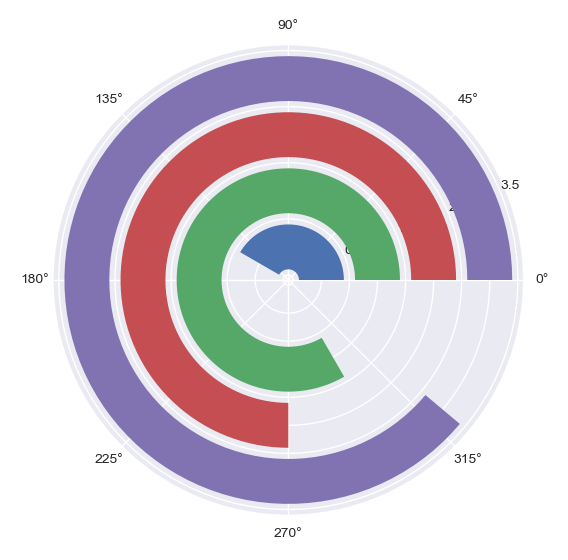

In [13]:
import math

ax = plt.subplot(projection='polar')
ax.barh(0, math.radians(150))
ax.barh(1, math.radians(300))
ax.barh(2, math.radians(270))
ax.barh(3, math.radians(320))

C:\Users\dbee\Applications\Anaconda\envs\my_mult\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


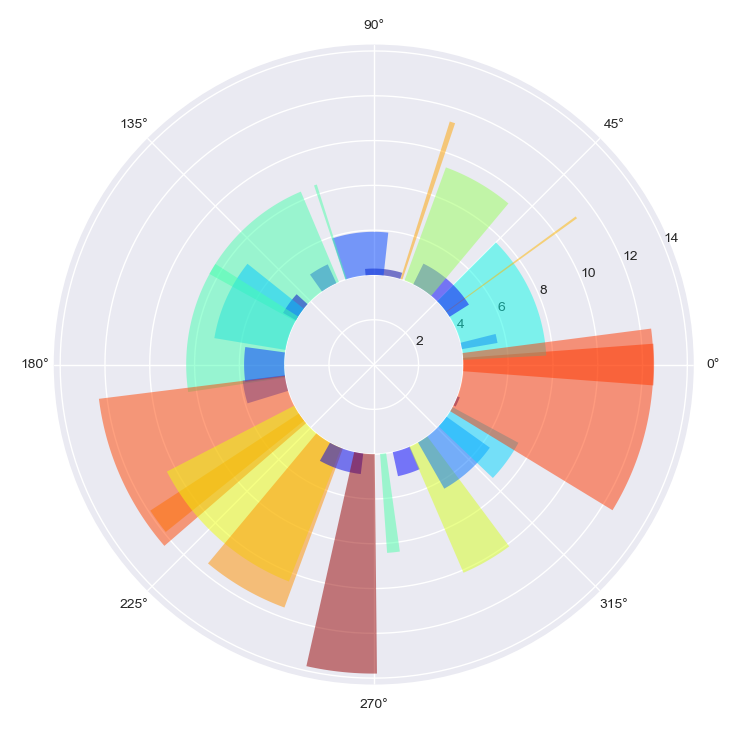

In [14]:
#!/usr/bin/env python

import numpy as np
import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc


# force square figure and square axes looks better for polar, IMO
fig = figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

N = 30
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = ax.bar(theta, radii, width=width, bottom=4.0)
for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet(r/10.))
    bar.set_alpha(0.5)

show()